In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees, pearson
import pandas as pd
import seaborn

In [16]:
T1 = SuchTree( 'data/gopher-louse/gopher.tree' )
T2 = SuchTree( 'data/gopher-louse/lice.tree' )
links = pd.DataFrame.from_csv( 'data/gopher-louse/gopher-louse-associations.txt' )

#T1 = SuchTree( 'data/plant-pollinators/bahe/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/bahe/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/bahe/bahe_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/beeh/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/beeh/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/beeh/beeh_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/fros/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/fros/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/fros/fros_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/hrat/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/hrat/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/hrat/hrat_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/moma/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/moma/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/moma/moma_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/nnog/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/nnog/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/nnog/nnog_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/smal/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/smal/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/smal/smal_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/wyth/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/wyth/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/wyth/wyth_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/wes/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/wes/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/wes/wes_links.csv' )
#links = links[ T1.leafs.keys() ]
#links = links.T[ T2.leafs.keys() ]


SLT = SuchLinkedTrees( T1, T2, links )

host_aj,  host_node_ids  = T1.adjacency( T1.root ).values()
guest_aj, guest_node_ids = T2.adjacency( T2.root ).values()

host_node_ids, guest_node_ids = host_node_ids.tolist(), guest_node_ids.tolist()

(0, 15)

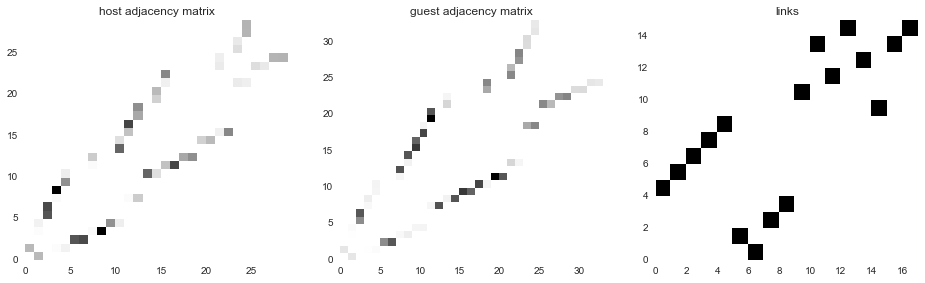

In [17]:
figure(figsize=(16,4.3))
subplot(1,3,1)
title('host adjacency matrix')
pcolor( host_aj )
xlim( (0,T1.length) )
ylim( (0,T1.length) )
subplot(1,3,2)
title('guest adjacency matrix')
pcolor( guest_aj )
xlim( (0,T2.length) )
ylim( (0,T2.length) )
subplot(1,3,3)
pcolor( links )
title('links')
xlim( (0,links.shape[1]) )
ylim( (0,links.shape[0]) )

In [18]:
guest_aj_links = map( lambda x : guest_node_ids.index(x) + host_aj.shape[0] , SLT.linklist[:,0] )
host_aj_links  = map( lambda x : host_node_ids.index(x),  SLT.linklist[:,1] )
zip(guest_aj_links, host_aj_links )

[(56, 27),
 (44, 16),
 (35, 6),
 (58, 9),
 (60, 19),
 (48, 5),
 (34, 5),
 (46, 18),
 (49, 6),
 (41, 17),
 (55, 26),
 (61, 20),
 (57, 28),
 (59, 13),
 (43, 22),
 (45, 8),
 (54, 25)]

In [25]:
def edge_mean( aj ) :
    return mean( aj.flatten()[ aj.flatten() > SLT.TreeA.polytomy_distance ] )

host_mean  = edge_mean( host_aj  / host_aj.max()  )
guest_mean = edge_mean( guest_aj / guest_aj.max() )

aj = zeros( ( host_aj.shape[0] + guest_aj.shape[0], host_aj.shape[1] + guest_aj.shape[1] ) )
aj[ 0:host_aj.shape[0], 0:host_aj.shape[1] ] = host_aj / host_aj.max()
aj[ host_aj.shape[0]:, host_aj.shape[1]: ] = guest_aj / guest_aj.max()

#for i,j in zip( random.permutation(guest_aj_links), random.permutation(host_aj_links ) ) :
for i,j in zip( guest_aj_links, host_aj_links ) :
    aj[i,j] = ( host_mean + guest_mean ) / 2.0
    aj[j,i] = ( host_mean + guest_mean ) / 2.0

(0, 62)

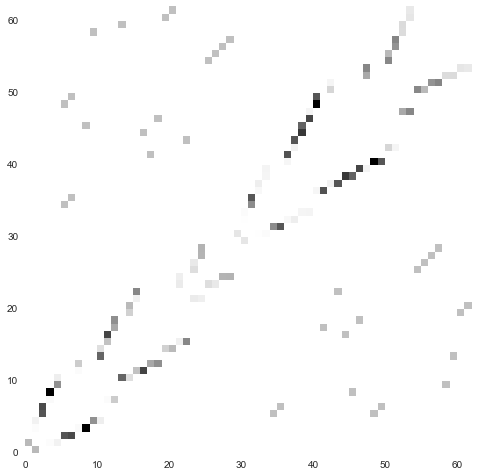

In [26]:
figure(figsize=(8,8))
pcolor(aj)
xlim( (0,aj.shape[0]) )
ylim( (0,aj.shape[1]) )

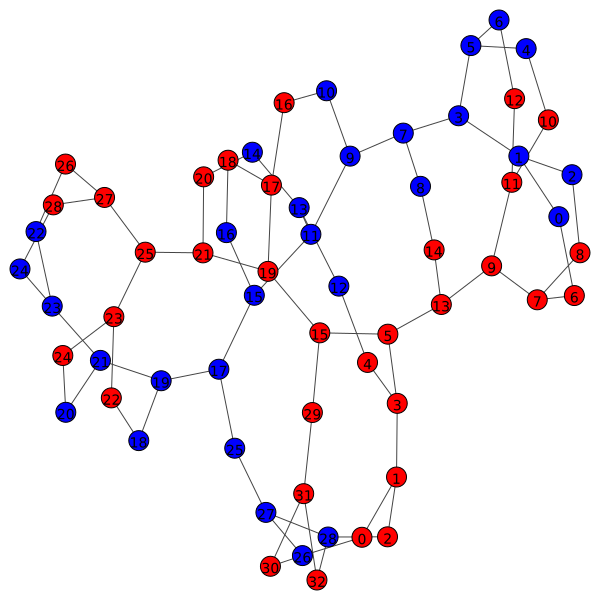

In [27]:
import igraph

g = igraph.Graph.Weighted_Adjacency( aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
g.vs['label'] = host_node_ids + guest_node_ids
g.vs['tree'] = ['host']  * len( host_node_ids ) + ['guest'] * len( guest_node_ids )
color_dict = { 'host' : 'blue', 'guest' : 'red' }
g.vs['color'] = [color_dict[tree] for tree in g.vs["tree"]]
layout = g.layout_kamada_kawai()
igraph.plot( g, layout=layout, target='gophers.png' )

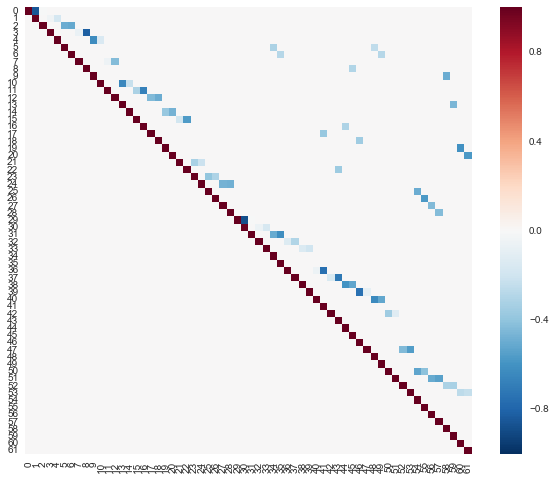

In [28]:
lp = matrix(g.laplacian( weights='weight', normalized=True ))

figure(figsize=(10,8))
seaborn.heatmap( triu(lp) )

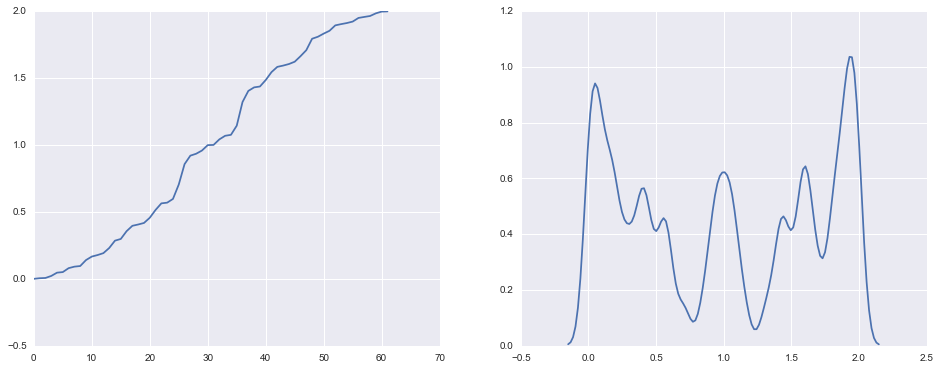

In [29]:
figure( figsize=(16,6) )
lambdas = linalg.eigvals( lp )
#plot(sorted(lambdas))
subplot(1,2,1)
plot( sorted(lambdas) )
subplot(1,2,2)
seaborn.kdeplot( lambdas, bw=0.05 )

In [30]:
def permute_links( linklist, deletions, additions, swaps ) :
    ll = array( linklist )
    for i in xrange( 1, deletions ) :
        ll = delete( ll, randint(len(ll)), axis=0 )
    for i in xrange( 1, swaps ) :
        x, y = random.choice( xrange( len(ll) ), size=2, replace=False )
        X, Y = ll[x,1], ll[y,1]
        ll[x,1] = Y
        ll[y,1] = X
    for i in xrange( 1, additions ) :
        a = random.choice( SLT.TreeA.leafs.values() )
        b = random.choice( SLT.TreeB.leafs.values() )
        ll = numpy.concatenate( (ll, array([[b,a]])), axis=0 )
    return ll

def edge_mean( aj ) :
    return mean( aj.flatten()[ aj.flatten() > SLT.TreeA.polytomy_distance ] )


def graph_spectral_density( SLT, deletions=0, additions=0, swaps=0, mode='lambdas' ) :
    
    linklist = permute_links( SLT.linklist, deletions, additions, swaps )
    
    host_aj,  host_node_ids  = SLT.TreeA.adjacency( SLT.TreeA.root ).values()
    guest_aj, guest_node_ids = SLT.TreeB.adjacency( SLT.TreeB.root ).values()
    
    host_node_ids, guest_node_ids = host_node_ids.tolist(), guest_node_ids.tolist()
    
    guest_aj_links = map( lambda x : guest_node_ids.index(x) + host_aj.shape[0] , linklist[:,0] )
    host_aj_links  = map( lambda x : host_node_ids.index(x), linklist[:,1] )
    zip(guest_aj_links, host_aj_links )
    
    aj = zeros( ( host_aj.shape[0] + guest_aj.shape[0], host_aj.shape[1] + guest_aj.shape[1] ) )
    aj[ 0:host_aj.shape[0], 0:host_aj.shape[1] ] = host_aj / host_aj.max()
    aj[ host_aj.shape[0]:, host_aj.shape[1]: ] = guest_aj / guest_aj.max()
    
    host_mean  = edge_mean( host_aj  / host_aj.max()  )
    guest_mean = edge_mean( guest_aj / guest_aj.max() )
    
    for i,j in zip( guest_aj_links, host_aj_links ) :
        aj[i,j] = ( host_mean + guest_mean ) / 2.0
        aj[j,i] = ( host_mean + guest_mean ) / 2.0
        
    if mode == 'adjacency' :
        return aj
    
    g = igraph.Graph.Weighted_Adjacency( aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
    lp = matrix(g.laplacian( weights='weight', normalized=True ))
    
    if mode == 'laplacian' :
        return lp
    
    lambdas = linalg.eigvalsh( lp )
    return lambdas

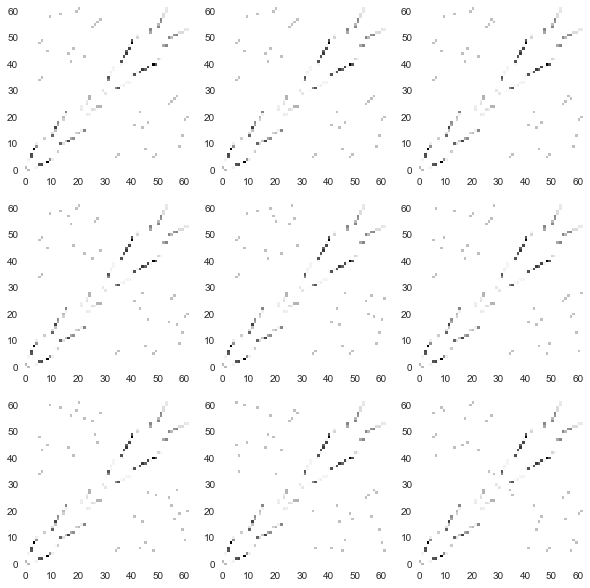

In [31]:
figure(figsize=(10,10))
for i in xrange( 9 ) :
    subplot(3,3,i+1)
    aj = graph_spectral_density( SLT, additions=0, deletions=0, swaps=i, mode='adjacency' )
    pcolor( aj )
    xlim( (0,aj.shape[1]) )
    ylim( (0,aj.shape[0]) )
    #xticks = []
    #yticks = []

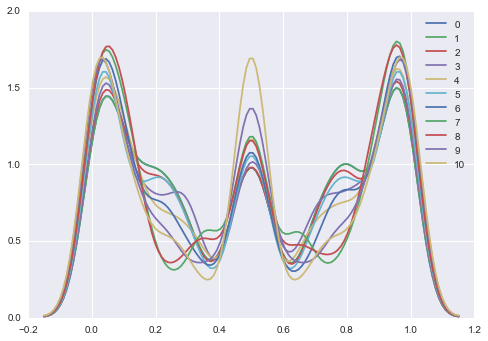

In [32]:
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=0, deletions=int(i), swaps=0 )
    seaborn.kdeplot( lambdas / lambdas.max(), label=int(i), bw=0.05 )
#savefig( 'spectral-gophers.png' )

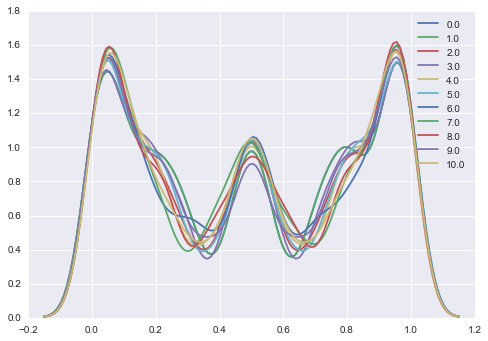

In [33]:
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=0, deletions=0, swaps=int(i) )
    seaborn.kdeplot( lambdas / lambdas.max(), label=i, bw=0.05 )

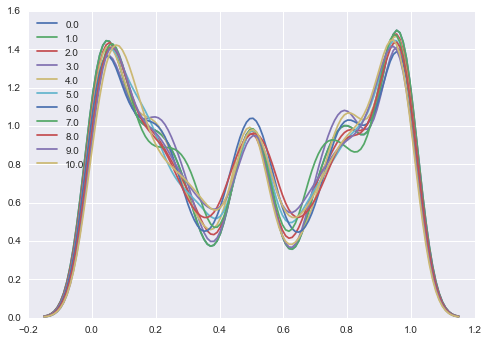

In [34]:
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=int(i), deletions=0, swaps=0 )
    seaborn.kdeplot( lambdas / lambdas.max(), label=i, bw=0.05 )

In [53]:
from scipy.stats import skew, entropy, gaussian_kde, kurtosis
import pyprind

def spectral_density( mgl ) :
    lambdas, vectors = linalg.eig( mgl )
    kde = gaussian_kde( lambdas / max( lambdas ) )
    return kde.pdf( linspace( -0.5,1.5,100) )

def pdd( a, b ) :
    return ( 0.5 * entropy( h_sd, g_sd ) + 0.5 * entropy( g_sd, h_sd ) )**(0.5)

#studies = [ { 'name' : 'Gopher, Lice',
#              'host' : 'data/gopher-louse/gopher.tree',
#              'guest': 'data/gopher-louse/lice.tree',
#              'links': 'data/gopher-louse/gopher-louse-associations.csv' },
#           
#            { 'name' : 'Fruit, Birds of Paradise',
#              'host' : 'data/plant-pollinators/beeh/plant.tree',
#              'guest': 'data/plant-pollinators/beeh/animal.tree',
#              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },
#          
#          ]

cases = []

fraction = 0.5

progbar = pyprind.ProgBar( len(studies)*11**3, monitor=True, title='building space...' )
for study in studies :
    T1 = SuchTree( study['host'] )
    T2 = SuchTree( study['guest'] )
    links = pd.DataFrame.from_csv( study['links'] )
    links = links[ T1.leafs.keys() ]
    links = links.T[ T2.leafs.keys() ]
    SLT = SuchLinkedTrees( T1, T2, links )
    
    for i in linspace( 0, fraction, 11 ) :
        for j in linspace( 0, fraction, 11 ) :
            for k in linspace( 0, fraction, 11 ) :
                I,J,K = i * SLT.n_links, j * SLT.n_links, k * SLT.n_links
                progbar.update()
                lambdas = graph_spectral_density( SLT, additions=int(I), deletions=int(J), swaps=int(K) )
                sd = gaussian_kde( lambdas ).pdf( linspace( -0.5,1.5,100) )
                cases.append( { 'study'     : study['name'],
                                'deletions' : int(I),
                                'additions' : int(J),
                                'swaps'     : int(K),
                                'skew'      : real(skew( sd )),
                                'kurtosis'  : real(kurtosis( sd )),
                                'eigengap'  : real(sorted(lambdas)[-1] - sorted(lambdas)[-2] ) } )

S = pd.DataFrame( cases )[ ['study', 'additions', 'deletions', 'swaps', 'skew', 'kurtosis', 'eigengap'] ]

building space...
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:12:00


/home/russell/opt/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


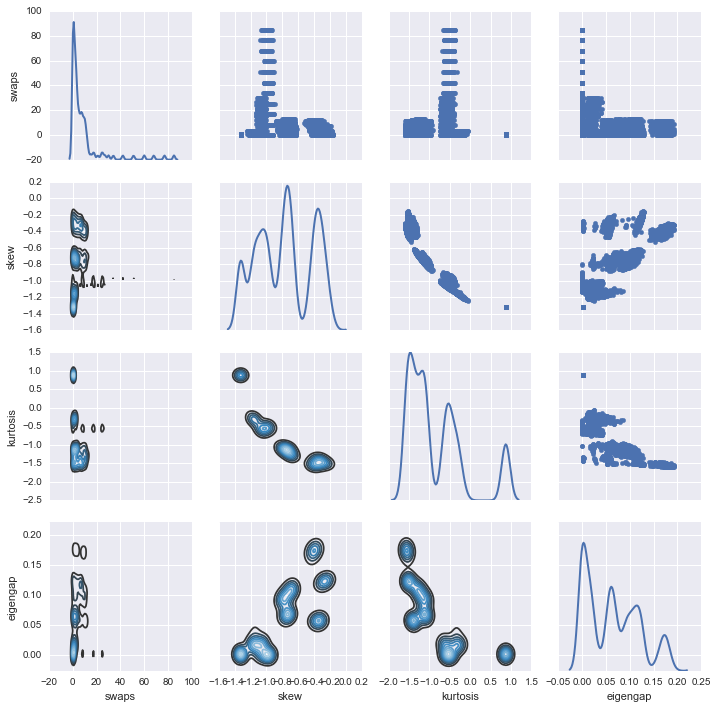

In [38]:
grid = seaborn.PairGrid(S[['swaps', 'skew', 'kurtosis', 'eigengap']], diag_sharey=False)
grid.map_lower(seaborn.kdeplot, cmap="Blues_d")
grid.map_upper(scatter)
grid.map_diag(seaborn.kdeplot, lw=2)

/home/russell/opt/lib/python2.7/site-packages/ipykernel/__main__.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


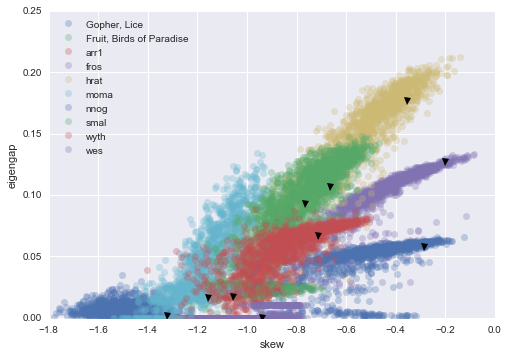

In [54]:
var1 = 'skew'
var2 = 'eigengap'

#study_names = [ 'Gopher, Lice', 'Fruit, Birds of Paradise' ]
#colors = [ 'red', 'blue' ]
study_names = map( lambda x : x['name'], studies )

for s in study_names :
    plot( S[ S['study'] == s][var1], 
          S[ S['study'] == s][var2],
          marker='o',
          lw=0,
          alpha=0.3,
          label=s)

xlabel( var1 )
ylabel( var2 )
originals = S.drop_duplicates(['study','additions','deletions','swaps'])[ ( S['additions'] == 0 ) & ( S['deletions'] == 0 ) & ( S['swaps'] == 0 ) ]
legend(loc=0)
plot( originals[var1], originals[var2], marker='v', lw=0, color='k' )

In [44]:
originals

,study,additions,deletions,swaps,skew,kurtosis,eigengap
0,"Gopher, Lice",0,0,0,-1.32404848948,0.87334439735,0.00132689122891
1331,"Fruit, Birds of Paradise",0,0,0,-0.765280297574,-1.14653488692,0.0930069635269
2662,arr1,0,0,0,-1.05767773198,-0.605792504809,0.0169185395614
3993,fros,0,0,0,-0.200228640354,-1.52152912071,0.126785730847
5324,hrat,0,0,0,-0.353001910193,-1.57086928438,0.176574927794
6655,moma,0,0,0,-1.15814070672,-0.317882494829,0.0159446450966
7986,nnog,0,0,0,-0.285206936609,-1.4003841507,0.0576552597074
9317,smal,0,0,0,-0.66489648404,-1.30407424957,0.106349301695
10648,wyth,0,0,0,-0.714813296545,-1.1291322429,0.0669515372459
11979,wes,0,0,0,-0.939104040666,-0.506818621001,4.4408920985e-16


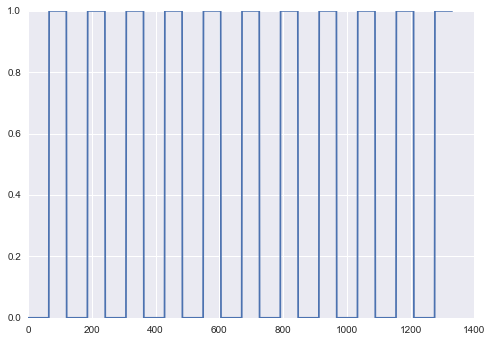

In [52]:
GL = S[ S['study'] == 'Gopher, Lice' ]

plot( GL['additions'] )

In [36]:
studies = [ { 'name' : 'Gopher, Lice',
              'host' : 'data/gopher-louse/gopher.tree',
              'guest': 'data/gopher-louse/lice.tree',
              'links': 'data/gopher-louse/gopher-louse-associations.csv' },
           
            { 'name' : 'Fruit, Birds of Paradise',
              'host' : 'data/plant-pollinators/beeh/plant.tree',
              'guest': 'data/plant-pollinators/beeh/animal.tree',
              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },

            { 'name' : 'arr1',
              'host' : 'data/plant-pollinators/arr1/plant.tree',
              'guest': 'data/plant-pollinators/arr1/animal.tree',
              'links': 'data/plant-pollinators/arr1/arr1_links.csv' },

            { 'name' : 'fros',
              'host' : 'data/plant-pollinators/fros/plant.tree',
              'guest': 'data/plant-pollinators/fros/animal.tree',
              'links': 'data/plant-pollinators/fros/fros_links.csv' },

            { 'name' : 'hrat',
              'host' : 'data/plant-pollinators/hrat/plant.tree',
              'guest': 'data/plant-pollinators/hrat/animal.tree',
              'links': 'data/plant-pollinators/hrat/hrat_links.csv' },

            { 'name' : 'moma',
              'host' : 'data/plant-pollinators/moma/plant.tree',
              'guest': 'data/plant-pollinators/moma/animal.tree',
              'links': 'data/plant-pollinators/moma/moma_links.csv' },
           
            { 'name' : 'nnog',
              'host' : 'data/plant-pollinators/nnog/plant.tree',
              'guest': 'data/plant-pollinators/nnog/animal.tree',
              'links': 'data/plant-pollinators/nnog/nnog_links.csv' },

            { 'name' : 'smal',
              'host' : 'data/plant-pollinators/smal/plant.tree',
              'guest': 'data/plant-pollinators/smal/animal.tree',
              'links': 'data/plant-pollinators/smal/smal_links.csv' },

            { 'name' : 'wyth',
              'host' : 'data/plant-pollinators/wyth/plant.tree',
              'guest': 'data/plant-pollinators/wyth/animal.tree',
              'links': 'data/plant-pollinators/wyth/wyth_links.csv' },

            { 'name' : 'wes',
              'host' : 'data/plant-pollinators/wes/plant.tree',
              'guest': 'data/plant-pollinators/wes/animal.tree',
              'links': 'data/plant-pollinators/wes/wes_links.csv' },
           
          ]

In [16]:
from scipy.stats import skew, entropy, gaussian_kde, kurtosis
import pyprind

def pdd( a, b ) :
    return ( 0.5 * entropy( a, b ) + 0.5 * entropy( b, a ) )**(0.5)

spd = zeros( ( len(studies), len(studies) ) )

progbar = pyprind.ProgBar( len(studies)**2, monitor=True, title='building space...' )
for i,study1 in enumerate(studies) :
    for j,study2 in enumerate(studies) :
        progbar.update()
        if i == j : continue
        
        T11 = SuchTree( study1['host'] )
        T12 = SuchTree( study1['guest'] )
        links1 = pd.DataFrame.from_csv( study1['links'] )
        links1 = links1[ T11.leafs.keys() ]
        links1 = links1.T[ T12.leafs.keys() ]
        SLT1 = SuchLinkedTrees( T11, T12, links1 )
        
        T21 = SuchTree( study2['host'] )
        T22 = SuchTree( study2['guest'] )
        links2 = pd.DataFrame.from_csv( study2['links'] )
        links2 = links2[ T21.leafs.keys() ]
        links2 = links2.T[ T22.leafs.keys() ]
        SLT2 = SuchLinkedTrees( T21, T22, links2 )
        
        eigenvals1 = graph_spectral_density( SLT1 )
        eigenvals2 = graph_spectral_density( SLT2 )
        
        
        gsdd1 = gaussian_kde( eigenvals1 / max( eigenvals1 ) ).pdf( linspace( -0.5,1.5,100) )
        gsdd2 = gaussian_kde( eigenvals2 / max( eigenvals2 ) ).pdf( linspace( -0.5,1.5,100) )
                
        spd[i,j] = pdd( gsdd1, gsdd2 )

building space...
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:12


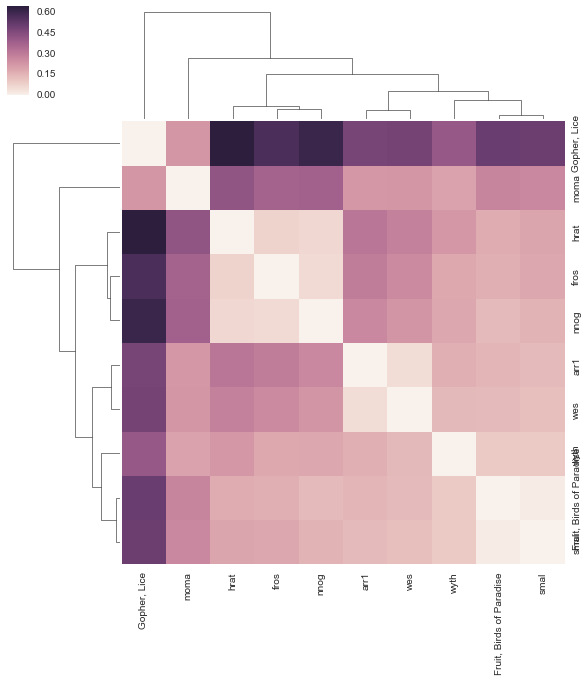

In [17]:
studynames = map( lambda x : x['name'], studies )
seaborn.clustermap( pd.DataFrame( spd, index=studynames, columns=studynames ) )

In [124]:
SLT2.TreeA.leafs

{'Bryonia_dioica': 12,
 'Crataegus_monogyna': 10,
 'Euonymus_europaeus': 2,
 'Hedera_helix': 16,
 'Lonicera_periclymenum': 20,
 'Prunus_spinosa': 4,
 'Rosa_sp.': 8,
 'Rubus_sp.': 6,
 'Sambucus_nigra': 18,
 'Solanum_dulcamara': 14,
 'Tamus_communis': 0}

In [12]:
std( host_aj.flatten()[ host_aj.flatten() > SLT.TreeB.polytomy_distance ] )

0.28747978728803447

In [15]:
host_aj

array([[  0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00

In [46]:
array([SLT.TreeA.polytomy_distance])[0] > array([SLT.TreeA.polytomy_distance])[0]

False

In [21]:
host_aj.dtype

dtype('float64')

In [53]:
type(SLT.TreeA.polytomy_distance)

float

In [57]:
np.finfo( np.float64 ).eps

2.2204460492503131e-16